In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
df=gpd.read_file(r"backend\myproject\myapp2\utils\synthetic dataset.csv")

In [4]:
import json
place ="Coimbatore"
df2=df.loc[df["District"]==place]
polygon=df2["polygon"].to_json()
#geojson=polygon.to_json()\n",
polygon.replace(r"n","")
polygon=json.loads(polygon)
print(polygon)

{'0': '77.00028781059154, 11.0803107555833,77.00032843956001, ,11.07975255273253,77.00144573618769,11.079682777301002,77.00134679260685,11.080292109754183,77.00028781059154,11.080310755583383', '1': ' 77.00452041210212, 11.084496776167597,77.00438836795456,11.083769129083507,77.0054244066464,11.08368938682672,77.0053329914673,11.084566550450845,77.00452041210212,11.084496776167597', '2': ' 76.9934186841873, 11.079772040758229,   76.99345931315577, 11.078276849404446, 76.9947492828984, 11.078246945499288,76.99475944014051,  11.079762072841149, 76.9934186841873, 11.079772040758229\n             \n            \n            \n            \n            \n              \n            \n           \n                           ', '3': '76.99641714231325, 11.085738911407148, 76.99642967185031, 11.084829025025314,76.99775780277497, 11.085148715157814, 76.99778286184915, 11.085972530426446,76.99641714231325,11.085738911407148', '4': '76.99432476243982,11.089931685445734,76.99445005780922, 11.08846

In [ ]:
district=input("Enter the district:")
area=float(input("Enter the area size required:"))
filter_df=df[df["district"]==district]
land1=df["Area(sq ft)"].iloc[0]
land1

In [6]:
district_data = df[df["District"]=="Coimbatore"]
polygon=district_data["polygon"].to_json()
print(type(polygon))
area=float(input("Enter the area size required:"))
filter_df=df[df["district"]==district]
land1=df["Area(sq ft)"].iloc[0]

<class 'str'>


In [9]:
land_id = input("Enter the land id:")
land=df[df["Land Record ID"]==land_id]
lat=land["Latitude"].iloc[0]
lon=land["Longitude"].iloc[0]
#lat=str(land[\"Latitude\"])\n",
#lon=str(land[\"Longitude\"])\n",
print(lat,lon)
#land.head()

11.083155 77.002651


In [10]:
water_level=float(land["Water level"])
Soil_Quality=float(land["Soil Quality"])
sea_level=float(land["MSL"])
print(sea_level)
#print(water_lvl,Soil_Quality,MSL)\n",
#land.head()"

3.0


C:\Users\harie\AppData\Local\Temp\ipykernel_15884\138946830.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water_level=float(land["Water level"])
C:\Users\harie\AppData\Local\Temp\ipykernel_15884\138946830.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Soil_Quality=float(land["Soil Quality"])
C:\Users\harie\AppData\Local\Temp\ipykernel_15884\138946830.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sea_level=float(land["MSL"])


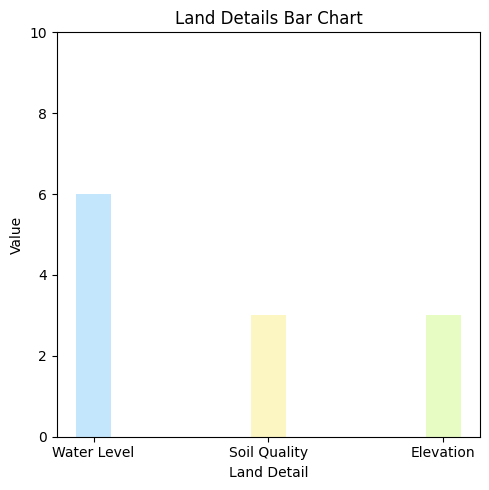

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import io
#buffer to save the plot\n",
buffer=io.BytesIO()
# Define the dictionary with land details\n",
land_details = {
    "Water Level": water_level,
    "Soil Quality": Soil_Quality,
    "Elevation": sea_level
}

bar_colors = ['#c3e6fc', '#fcf6c3', '#e6fcc3']
# Extract data for the bar chart\n",
x_values = list(land_details.keys())
y_values = list(land_details.values())

# Create the bar chart\n",
plt.figure(figsize=(5, 5))
plt.bar(x_values, y_values, width=0.2,color=bar_colors)

# Set chart labels and title\n",
plt.xlabel("Land Detail")
plt.ylabel("Value")
plt.title("Land Details Bar Chart")
# Set y-axis limit from 0 to 10\n",
plt.ylim(0, 10)
# Add grid and tight layout\n",
plt.grid(False)
plt.tight_layout()
plt.savefig(buffer,format='png')
buffer.seek(0)

# Show the chart\n",
plt.show()
#clear the plot for reuse\n",
plt.clf()


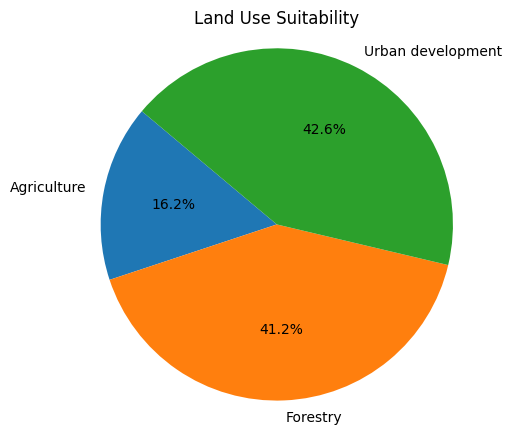

The most suitable land use is: Urban development


<Figure size 640x480 with 0 Axes>

In [12]:
buffer1=io.BytesIO()
# Define land information\n",
#soil_quality = 3  # 1-5 scale\n",
#water_level = 2  # 1-5 scale\n",
soil_type = df["soil type"][0]  # Clay, Loam, Sandy loam
elevation = float(df["Land elevation"][0])  # meters
#\n",
# Define land use suitability scores\n",
land_use_scores = {
    "Agriculture": (Soil_Quality * 0.5 + water_level * 0.3 + 0.2) * (1 if soil_type in ["Loam", "Sandy loam"] else 0.5),
    "Forestry": (Soil_Quality * 0.2 + water_level * 0.1 + elevation * 0.7) * (1 if soil_type in ["Clay", "Loam"] else 0.5),
    "Urban development": (Soil_Quality * 0.1 + water_level * 0.2 + elevation * 0.7) * (1 if soil_type in ["Sandy loam"] else 0.5),
}
# Calculate total score\n",
total_score = sum(land_use_scores.values())

# Calculate land use percentages\n",
land_use_percentages = {
    land_use: (land_use_scores[land_use] / total_score) * 100
    for land_use in land_use_scores
}

# Extract land use with highest percentage\n",
highest_percentage_land_use = max(land_use_percentages, key=land_use_percentages.get)

# Create pie chart\n",
plt.figure(figsize=(5, 5))
plt.pie(
    land_use_percentages.values(),
    labels=land_use_percentages.keys(),
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Land Use Suitability")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart\n",
plt.savefig(buffer1,format="png")
buffer1.seek(0)
plt.show()
plt.clf()
# Print the land use with the highest percentage
print(f"The most suitable land use is: {highest_percentage_land_use}")

In [13]:
from geopy.distance import distance

In [18]:
def min_dis_rail(primary_loc):
    type_t="Railway"
    df3=pd.read_csv(r"backend\myproject\myapp2\utils\Transportation.csv",usecols=["Latitude","Longitude","Transport"])
    t_lat=df3.loc[df3["Transport"]==type_t,"Latitude"]
    t_lon=df3.loc[df3["Transport"]==type_t,"Longitude"]
    d=[]
    for i,j in zip(t_lat,t_lon):
        if (i,j) == primary_loc:
            continue
        else:
            #location=(i,j)\n",
            dist=distance(primary_loc,(i,j)).km
            dist=round(dist,3)
            d.append(dist)

    min_d=str(min(d))

    #return min_d\n",
    #print(type(min(d)))\n",
    print(f"Nearest {type_t} :",min_d,"km")

In [19]:
def min_dis_Bus(primary_loc):
    type_t="Bus Stop"
    df3=pd.read_csv(r"backend\myproject\myapp2\utils\Transportation.csv",usecols=["Latitude","Longitude","Transport"])
    t_lat=df3.loc[df3["Transport"]==type_t,"Latitude"]
    t_lon=df3.loc[df3["Transport"]==type_t,"Longitude"]
    d=[]
    for i,j in zip(t_lat,t_lon):
        if (i,j) == primary_loc:
            continue
        else:
            #location=(i,j)\n",
            dist=distance(primary_loc,(i,j)).km
            dist=round(dist,3)
            d.append(dist)

    min_d=str(min(d))

    #return min_d\n",
    #print(type(min(d)))\n",
    print(f"Nearest {type_t} :",min_d,"km")

In [20]:
def min_dis_air(primary_loc):
    type_t="Airport"
    df3=pd.read_csv(r"backend\myproject\myapp2\utils\Transportation.csv",usecols=["Latitude","Longitude","Transport"])
    t_lat=df3.loc[df3["Transport"]==type_t,"Latitude"]
    t_lon=df3.loc[df3["Transport"]==type_t,"Longitude"]
    d=[]
    for i,j in zip(t_lat,t_lon):
        if (i,j) == primary_loc:
            continue
        else:
            #location=(i,j)\n",
            dist=distance(primary_loc,(i,j)).km
            dist=round(dist,3)
            d.append(dist)

    min_d=str(min(d))

    #return min_d\n",
    #print(type(min(d)))\n",
    print(f"Nearest {type_t} :",min_d,"km")

In [21]:
primary_loc=(lat,lon)
#print(type(lat))\n",
#print(lat,lon)\n",
#primary_loc=(\"11.083155\",\"77.002651\")\n"
min_dis_rail(primary_loc)
min_dis_Bus(primary_loc)
min_dis_air(primary_loc)

Nearest Railway : 7.649 km
Nearest Bus Stop : 3.534 km
Nearest Airport : 7.045 km


In [22]:
def flood(ele):
    flooding_threshold=8
    if ele>flooding_threshold:
        print(f"Main Sea Level {ele}: Land has high risk of flood")
    elif ele<flooding_threshold:
        print(f"Main Sea Level {ele}: Land has low chance of flood")

ele=land["MSL"].iloc[0]
flood(float(ele))


Main Sea Level 3.0: Land has low chance of flood
